<a href="https://colab.research.google.com/github/AjitVarpe/Data-Analysis-of-playstore/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#  Importing lib and module
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
Data_Frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capston Project/EDA/Copy of Play Store Data.csv')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capston Project/EDA/Copy of User Reviews.csv')
#  Reading the both CSV file


In [7]:
Data_Frame.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
Data_Frame.head()
# Reading frist five rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
type(Data_Frame)
# checking type

pandas.core.frame.DataFrame

In [10]:
Data_Frame.tail()
#  Checking the last 5 list

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
Data_Frame.shape
#  Cheking shape of data

(10841, 13)

In [ ]:
Data_Frame.describe()
#  checking the information

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


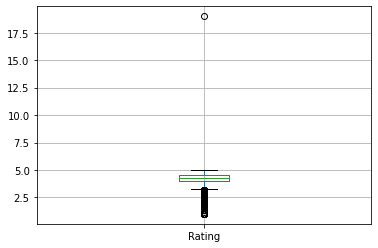

In [11]:
Data_Frame.boxplot()
# ploting the graph to check the where the values apper

In [12]:
Data_Frame[Data_Frame.Rating>5]
#  To check the data that containing values that are grater than the 5 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f33983a50>]],
      dtype=object)

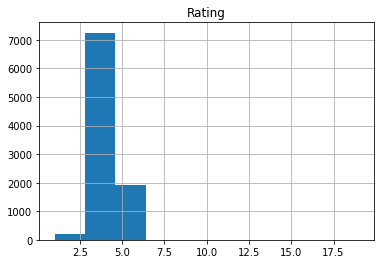

In [ ]:
Data_Frame.hist()
#  checking the histrogam to check the where values are concentrated

In [ ]:
Data_Frame.info()
#  To check the non-null data values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
Data_Frame.loc[10472]


App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [11]:
Data_Frame.drop(Data_Frame.index[10472], inplace=True)
#  # Row 10472 removed due to having the wrong record of rating 

In [13]:
Data_Frame['Installs'] = Data_Frame['Installs'].map(lambda x: x.rstrip('+'))
#  Removing + sign from the installs columns

In [15]:
Data_Frame['Installs'] = pd.to_numeric(Data_Frame['Installs'].str.replace(',',''))

In [16]:
Data_Frame['Price'] = pd.to_numeric(Data_Frame['Price'].str.replace('$',''))
#  Removing $ sign from the recoreds to easy perform numeric opration

In [18]:
Data_Frame.info()
#  Cheking the records information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  int64  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [15]:
Data_Frame['Installs'].min(),Data_Frame['Installs'].max()

('0', 'Free')

In [17]:
boolean = Data_Frame['App'].duplicated().any()
# checking the duplicate values in the record
boolean


True

In [18]:
Data_Frame['App'].value_counts()
# counting the duplicated values 

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
ESPN                                                 7
Candy Crush Saga                                     7
8 Ball Pool                                          7
                                                    ..
Weather by WeatherBug: Forecast, Radar & Alerts      1
We're Working Out - Al Kavadlo                       1
Manga Mania - Best online manga reader               1
EY Staff ENTERTAINER                                 1
Droid PRoCon BF3                                     1
Name: App, Length: 9660, dtype: int64

In [19]:
Data_Frame[Data_Frame['App']=='ROBLOX']
#  checking the data is credential or not


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [49]:
Data_Frame.drop_duplicates(inplace=True)
#  droping the duplicated values from the record

In [23]:
Data_Frame['Reviews'] = pd.to_numeric(Data_Frame['Reviews'].str.replace('M',''))
#  converting the reviews of the column to number data type 

In [24]:
Data_Frame = Data_Frame.loc[Data_Frame.groupby(['App'])['Reviews'].idxmax()]

**Setting the parameter for plot graph**

In [25]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [26]:
# checking the top 20 apps of the list
top_genres = Data_Frame.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [27]:
genres_installs = Data_Frame.groupby(['Genres'])[['Installs']].sum()

In [28]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

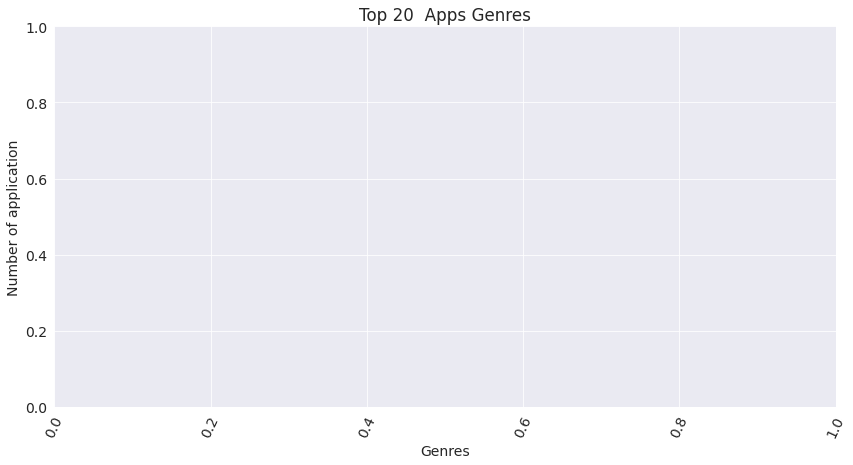

In [47]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20  Apps Genres")
sns.barplot(top_20_genres_installs.Genres,  top_20_genres_installs.Installs)
plt.show()

In [43]:
top_20_genres_installs.Installs

0     10,000+1,000+10+100,000,000+10,000+10,000+100,...
1     10+500,000+100,000+1,000,000+100,000+10,000,00...
2     100,000+5,000+50,000+10+100+500,000+1,000+50+1...
3     1,000,000+100+10+10+10,000+100,000+10,000+5,00...
4     5+1,000,000+1,000+5+100+10,000+1,000+10,000+10...
5     10,000,000+10,000,000+100,000+500,000+10,000,0...
6     100,000+500,000+500,000+500+10+1,000+1,000,000...
7     10,000+50,000+100,000+5+5,000+10+100+100+1,000...
8     500+10,000+500+100,000+10,000+10,000+100,000+1...
9     500+100,000+10,000,000+100,000,000+50,000,000+...
10    10,000+100+100+100+1,000,000+50,000+50+5,000+5...
11    1,000+10+10,000+10,000+50,000+10,000+100,000+1...
12    500,000+100,000+10,000+500,000+1,000,000+10,00...
13    100,000+100,000+5,000,000+10,000,000+100+1,000...
14    100+1,000,000+1,000,000+1,000,000+100,000+1,00...
15    1,000,000+0+1,000+1,000,000+100+10,000,000+1+5...
16    500+1,000+5,000,000+50+5,000+1,000+10,000+5,00...
17    100,000+50,000,000+10,000,000+10,000,000+5

NameError: ignored

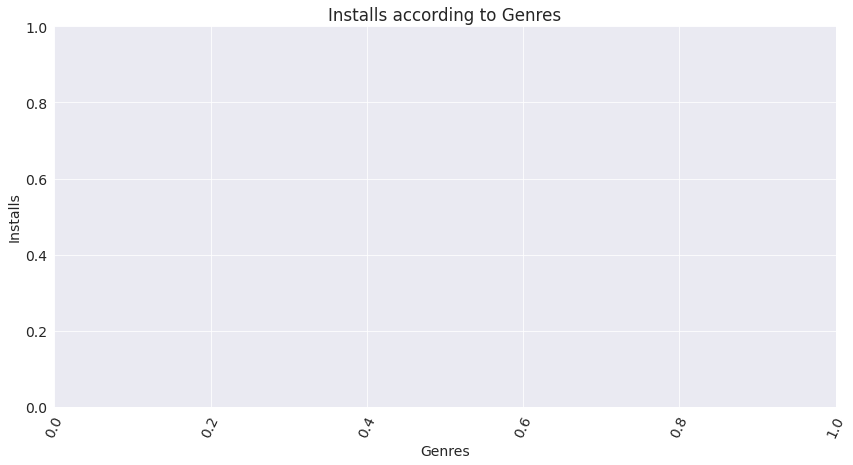

In [41]:
#  Genres that are getting installed the most in top 20 Genres
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres,top_20_genres_installs.Installs)
plt.show()

In [ ]:
Data_Frame.isnull().sum()
#  to get the sum of the not null values 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
df.head()
#  Checking the frist five data of the csv file

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
df.shape()

(64295, 5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f31d78990>,
      dtype=object)

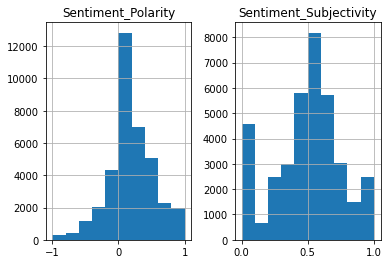

In [ ]:
df.hist()


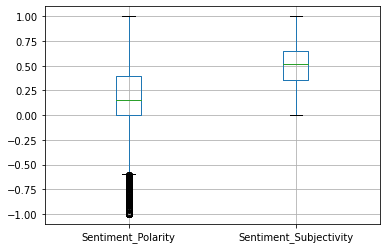

In [ ]:
df.boxplot()